In [259]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

msu = {
    1001: 'KoU',
    1002: 'ViVe',
    1003: 'Tahko',
    1004: 'Manse',
    1005: 'SoJy',
    1006: 'KPL',
    1007: 'JyJu',
    1008: 'IPV',
    1009: 'JoMa',
    1010: 'KaMa',
    1011: 'KeKi',
    1012: 'KiPa',
    1013: 'PattU',
    1014: 'SiiPe',
    1015: 'HP'
}

nsu = {
    2001: 'Fera',
    2002: 'Tahko',
    2003: 'JoMa',
    2004: 'KeKi',
    2005: 'Kirittäret',
    2006: 'Virkiä',
    2007: 'Manse',
    2008: 'MyVe',
    2009: 'PesäYsit',
    2010: 'Pesäkarhut',
    2011: 'SMJ',
    2012: 'SiiPe',
    2013: 'Roihu'
}

In [260]:
csv_name = 'runs_msu_2021'
all_runs = pd.read_csv('../{}.csv'.format(csv_name), low_memory=False)
csv_name_2 = 'runs_nsu_2021'
all_runs_nsu = pd.read_csv('../{}.csv'.format(csv_name_2), low_memory=False)

men_runkosarja = 1630022425
women_runkosarja = 1629849625

all_runs_nsu.head()

,id,base,lahto,aika,gameId,eventId,firsttime,lukkari,opponent,team,runner,streamUrl,run_date,uploader,leagueId,free,juoksu,unix_time
0,1647,1.0,0.439997,4.859997,441,i3qnnlijioyp75s8,4672.475065,Emmi Hannuniemi,2012,2012,Emmi Hannuniemi,https://dpe7aw9wpk40m.cloudfront.net/c847b487-...,2021-06-02 17:00:00,aaro.korpijarvi@gmail.com,2,NaN,4.420000,1622653200
1,1648,3.0,0.900000,6.160000,441,jnb27dojxu97obr0,5873.145993,Mari Mantsinen,2005,2005,Eeva Mäki-Maukola,https://dpe7aw9wpk40m.cloudfront.net/c847b487-...,2021-06-02 17:00:00,aaro.korpijarvi@gmail.com,2,NaN,5.260000,1622653200
2,1649,3.0,1.459992,6.559992,441,fghlylgrp66yf8lk,1707.265737,Mari Mantsinen,2005,2005,Venla Karttunen,https://dpe7aw9wpk40m.cloudfront.net/c847b487-...,2021-06-02 17:00:00,aaro.korpijarvi@gmail.com,2,NaN,5.100000,1622653200
3,1650,3.0,1.560000,6.480000,441,rv79rpja6y3hq6nh,9912.306227,Mari Mantsinen,2005,2005,Ella Korpela,https://dpe7aw9wpk40m.cloudfront.net/c847b487-...,2021-06-02 17:00:00,aaro.korpijarvi@gmail.com,2,NaN,4.920000,1622653200
4,1653,1.0,0.259993,4.399991,441,o406th9gp98hfsk5,1051.012815,Emmi Hannuniemi,2012,2012,Roosa Lappalainen,https://dpe7aw9wpk40m.cloudfront.net/c847b487-...,2021-06-02 17:00:00,aaro.korpijarvi@gmail.com,2,NaN,4.139998,1622653200


In [270]:
def get_distr_df(team_id, league_id):
    if league_id == 1:
        team_runs = all_runs[all_runs['team'] == team_id]
    else:
        team_runs = all_runs_nsu[all_runs_nsu['team'] == team_id]

    run_counts = team_runs.groupby(by='runner').count()[['id']].rename(columns={'id': 'n'})
    run_counts = run_counts.sort_values(by='n', ascending=False)

    run_counts['cumulative'] = run_counts.cumsum()
    number_of_runs = run_counts['cumulative'][-1]

    run_counts['%'] = round( run_counts.apply(lambda x: x[0] / number_of_runs, axis=1, result_type='expand'), 2)

    run_counts['cumulative%'] = round(run_counts['%'].cumsum(axis='rows'), 2)
    
    run_counts.drop('cumulative', inplace=True, axis=1)
    # print(run_counts)
    #empty = pd.DataFrame([[0, 0, 0, 0]], columns=['etenemiset', 'cumulative', '%', 'cumulative%'], index=['N'])
    #run_counts = pd.concat([empty, run_counts])
    # run_counts = run_counts.append(empty, ignore_index=True)

    return run_counts.head(5)

def get_cum_of_n_first(team_id, n, league_id):
    return get_distr_df(team_id, league_id)['cumulative%'][n - 1]

def get_cum_of_n_first_and_names(team_id, n, league_id):
    lis = get_distr_df(team_id, league_id)
    
    return [
        lis['cumulative%'][n - 1], 
        '{}, {}, {}'.format(lis.head(3).index[0].split()[1], lis.head(3).index[1].split()[1], lis.head(3).index[2].split()[1])
    ]

def get_league_avg_for_n(n, league_id):
    ns = []
    for team_id in range(1001 if league_id == 1 else 2001, 1016 if league_id == 1 else 2014):
        ns.append(get_cum_of_n_first(team_id, n, league_id))
        
    return np.average(ns)

arr = []
for league_id in [1, 2]:
    league = []
    for n in range(1, 6):
        league.append('{}%'.format(round( get_league_avg_for_n(n, league_id) * 100)))
    arr.append(league)

df = pd.DataFrame(arr, index=['MSU', 'NSU'])
df = df.rename(columns={0: '1 Etenijä'})
df = df.rename(columns={1: '2 Etenijää'})
df = df.rename(columns={2: '3 Etenijää'})
df = df.rename(columns={3: '4 Etenijää'})
df = df.rename(columns={4: '5 Etenijää'})

from IPython.display import display

display(df)

team_three_msu = []
for team_id in range(1001, 1016):
    firsts = get_cum_of_n_first_and_names(team_id, 3, 1)
    team_three_msu.append( {
        'Joukkue': msu[team_id], 
        'Osuus (%)': round(firsts[0] * 100),
        'Etenijät': firsts[1]
    } )
    
team_threes_msu = pd.DataFrame(team_three_msu).sort_values(by='Osuus (%)', ascending=False)
display(team_threes_msu)

team_three_nsu = []
for team_id in range(2001, 2014):
    firsts = get_cum_of_n_first_and_names(team_id, 3, 2)
    team_three_nsu.append( {
        'Joukkue': nsu[team_id], 
        'Osuus (%)': round(firsts[0] * 100),
        'Etenijät': firsts[1]
    } )
    
team_threes_nsu = pd.DataFrame(team_three_nsu).sort_values(by='Osuus (%)', ascending=False)
display(team_threes_nsu)

,1 Etenijä,2 Etenijää,3 Etenijää,4 Etenijää,5 Etenijää
MSU,26%,45%,60%,72%,80%
NSU,31%,50%,64%,74%,82%


,Joukkue,Osuus (%),Etenijät
2,Tahko,67,"Nurmio, Vikström, Vartama"
14,HP,66,"Rouhiainen, Heikkilä, Ahonen"
9,KaMa,65,"Vierimaa, Utunen, Kortteenperä"
5,KPL,64,"Pesu, Mäentausta, Saukko"
11,KiPa,64,"Purmonen, Eskelinen, Lattu"
6,JyJu,62,"Raunio, Kontio, Tyynelä"
0,KoU,61,"Kauppinen, Kettunen, Kuitunen"
7,IPV,60,"Sikiö, Pesonen, Pietinen"
12,PattU,60,"Piispanen, Juntunen, Pelto"
8,JoMa,58,"Piironen, Tirkkonen, Kettunen"


,Joukkue,Osuus (%),Etenijät
2,JoMa,78,"Pirskanen, Surakka, Hihnala"
5,Virkiä,68,"Rautakorpi, Peräaho, Ronkainen"
8,PesäYsit,68,"Rantonen, Laatikainen, Bertling"
9,Pesäkarhut,67,"Juka, Itävalo, Pauna"
7,MyVe,66,"Kirjala, Sihvonen, Lehtinen"
11,SiiPe,64,"Juntunen, Lappalainen, Vesalo"
12,Roihu,64,"Höglund, Penttinen, Höglund"
6,Manse,62,"Peltokangas, Lähde, Hukka"
3,KeKi,60,"Kesti, Ojala, Korhonen"
0,Fera,59,"Tanhua, Puolakka, Andreasen"


Index(['Eveliina Rantonen', 'Linnea Laatikainen', 'Tytti Bertling',
       'Tiia Saarela', 'Amanda Timperi', 'Elina Väre', 'Roosa Örså',
       'Linda Kemppainen', 'Essi Rytteri', 'Henriikka Harinen',
       'Eveliina Kainlauri', 'Hanna Järvi', 'Noora Leppälä', 'Elina Muurman',
       'Nea Forsell'],
      dtype='object', name='runner')
40.090090090090094
55.4054054054054
68.01801801801801
77.47747747747748
84.23423423423422
88.73873873873873
91.44144144144144
93.69369369369369
95.04504504504504
96.39639639639638
97.29729729729729
98.1981981981982
99.09909909909909
99.54954954954954
99.99999999999999


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

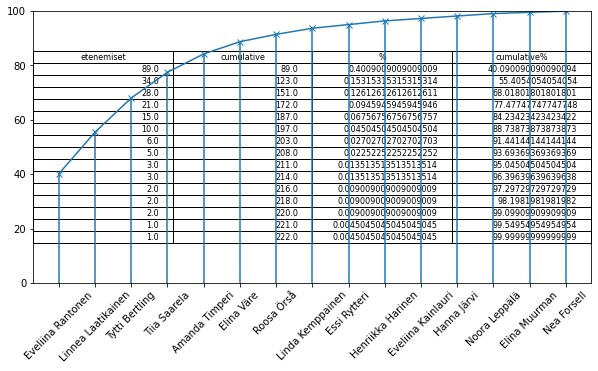

In [218]:
fig, ax = plt.subplots(figsize = (10, 5))

cum = run_counts[['cumulative%']]
print(cum.index)
for i in run_counts.T:
    print(run_counts.T[i]['cumulative%'])
    ax.vlines(x=i, ymin=0, ymax=run_counts.T[i]['cumulative%'])

# ax.plot([0, cum['cumulative%'][0]]
table = ax.table(cellText=run_counts.values, colLabels=run_counts.columns, loc='center')

ax.plot(cum, marker="x")
ax.set_ylim([0, 100])
plt.xticks(rotation=45)